# High Resolution Spectragram

In this notebook we show case the spectragram function and the advantages of the gap filling technique

In [10]:
import matplotlib.pyplot as plt
from Wind_Waves.plotting_tools import spectragram
import numpy as np
start, end= np.datetime64('2004-02-06T03:00'), np.datetime64('2004-02-06T09:00') # set time range

## Load Raw Data
Here we use vaex to load the raw example files that we need for the spectragram.

In [11]:
from Wind_Waves.integration_tools import create_sweeps, create_spins
from Wind_Waves.reading_tools import raw2csv
import vaex as vx
days = start+ np.arange((end.astype('datetime64[D]')-start.astype('datetime64[D]')).astype('timedelta64[D]')+1)
raw= vx.open(list((np.unique([raw2csv(date, '../Example_Data/raw_rad1/', '../Example_Data/raw_rad1/') for date in (days)]))))
raw.drop('SWEEP', inplace=True)
raw= raw.to_pandas_df()
create_sweeps(raw, time='Date_UTC')
create_spins(raw, spin='SPIN')
raw= vx.from_pandas(raw)

## Plot Data with Sweep Average and Ignore Gaps
In this example we ignore the frequency gaps and assume the bandwidths of each channel extend to the midpoints of the neighbouring channels to produce spectra that is continual in frequency. This is typically what has been done in the past. We also average the channels over the length of a full sweep cycle.

0.00031622776601683794 0.01


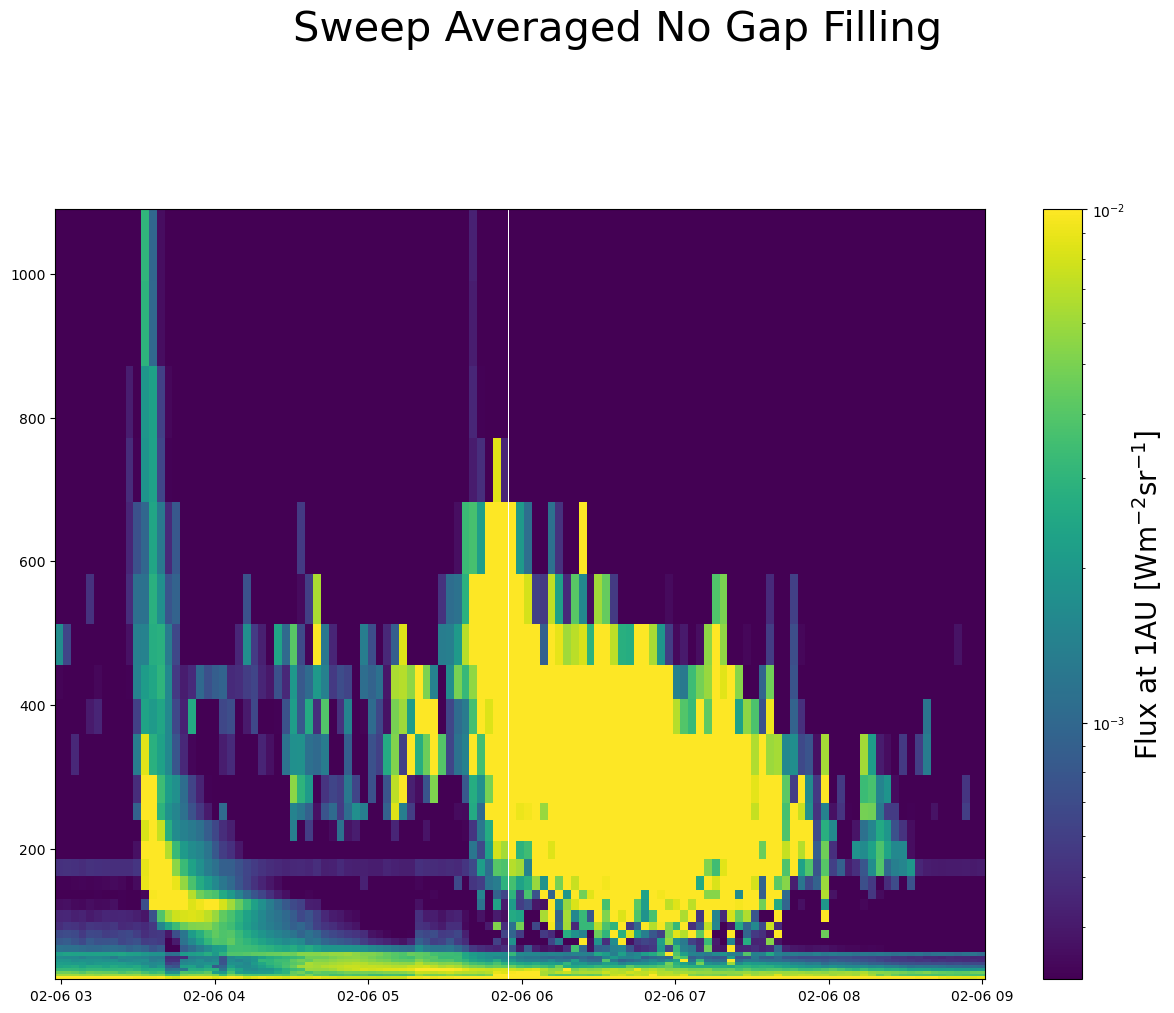

In [ ]:
fig=plt.figure(figsize=(15, 10))
ax= fig.add_subplot(111)
fig.suptitle(f"Sweep Averaged Ignore Gaps", 
                y=1.08, size=30)
pc, vals= spectragram(raw, ax=ax, groupby='SWEEP', frequency='FREQ', datetime='DATETIME_Z', flux='VZPAL',
                    start=start, end=end, gap_filling='ignore')
cbar= fig.colorbar(pc, ax=ax)
cbar.set_label('Flux at 1AU [Wm$^{-2}$sr$^{-1}$]', size=20)

## Plot Data with Sweep Average and No Gap Filling
Here we plot that the data using the actual bandwidth of the frequency channels. We still average the channels over a full sweep. This spectragram can be harder to read but is a more accurate representation of the data.

0.00031622776601683794 0.01


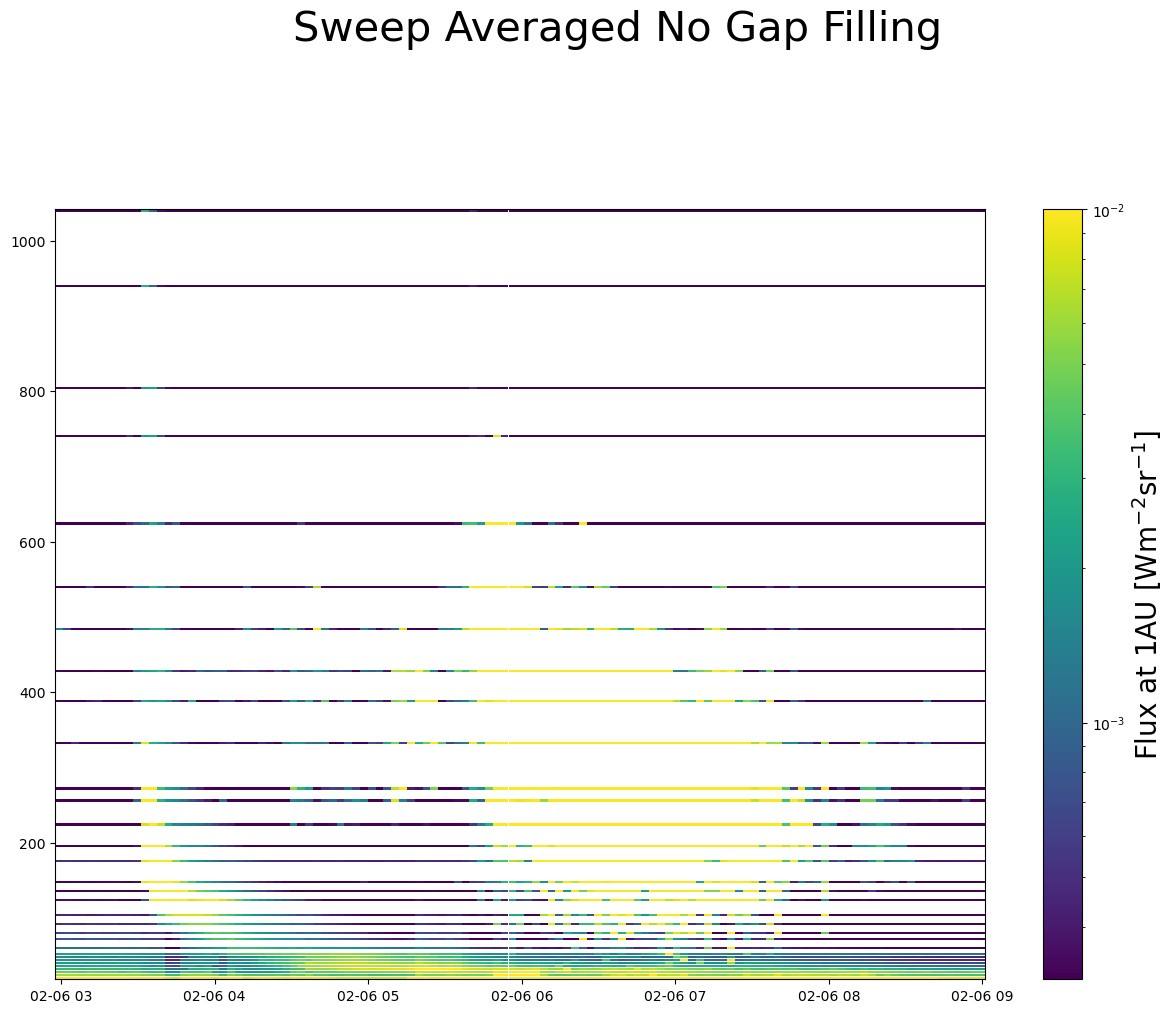

In [13]:
fig=plt.figure(figsize=(15, 10))
ax= fig.add_subplot(111)
fig.suptitle(f"Sweep Averaged No Gap Filling", 
                y=1.08, size=30)
pc, vals= spectragram(raw, ax=ax, groupby='SWEEP', frequency='FREQ', datetime='DATETIME_Z', flux='VZPAL',
                    start=start, end=end, gap_filling='keep')
cbar= fig.colorbar(pc, ax=ax)
cbar.set_label('Flux at 1AU [Wm$^{-2}$sr$^{-1}$]', size=20)

## Plot Data with Sweep Average and Gap Filling
Here we implement peicewise 1-D linear interpolation in time and frequency to produce a continual spectra with the sweep averaged data as input.

0.00031622776601683794 0.01


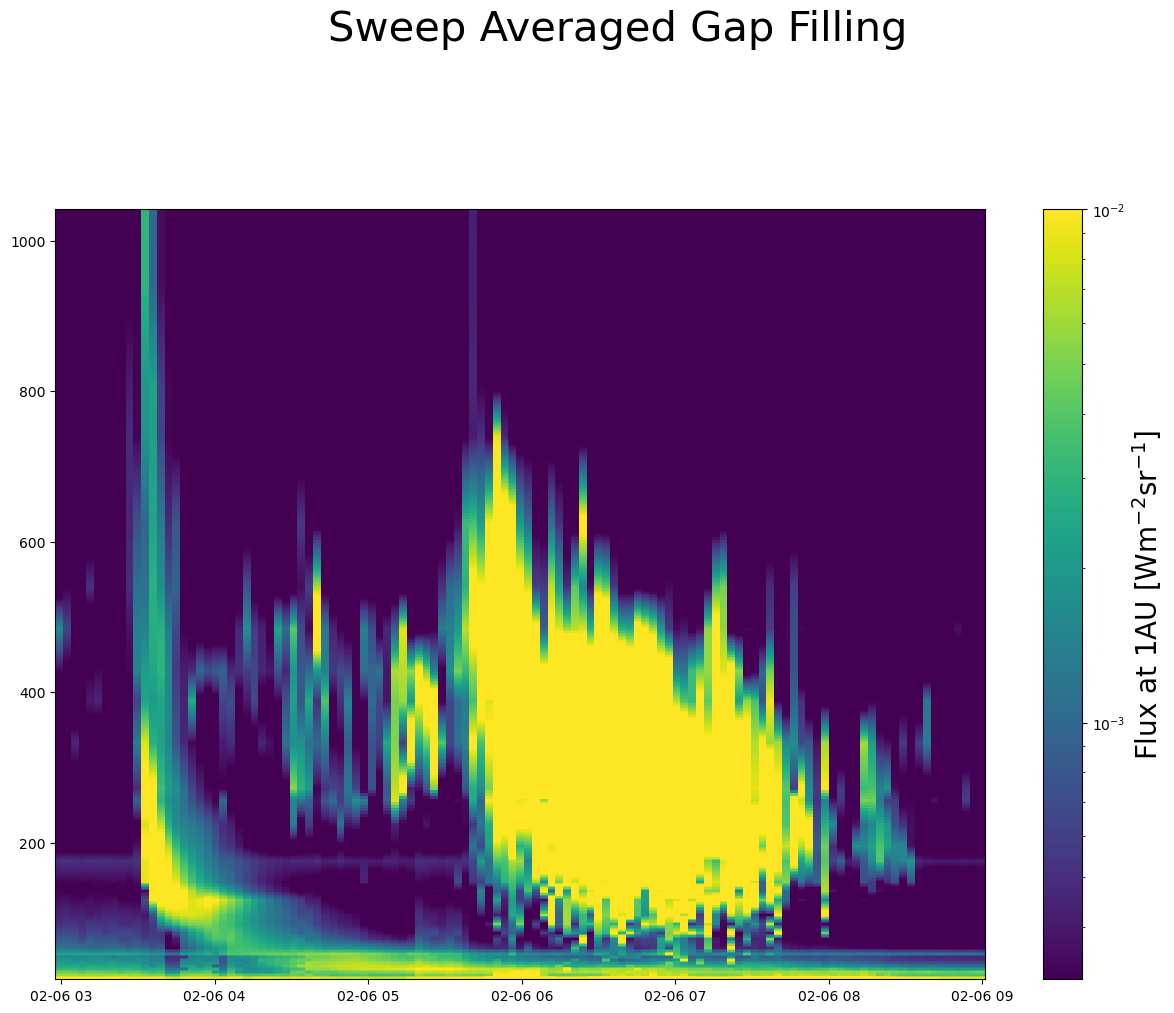

In [14]:
fig=plt.figure(figsize=(15, 10))
ax= fig.add_subplot(111)
fig.suptitle(f"Sweep Averaged Gap Filling", 
                y=1.08, size=30)
pc, vals= spectragram(raw, ax=ax, groupby='SWEEP', frequency='FREQ', datetime='DATETIME_Z', flux='VZPAL',
                    start=start, end=end, gap_filling='fill')
cbar= fig.colorbar(pc, ax=ax)
cbar.set_label('Flux at 1AU [Wm$^{-2}$sr$^{-1}$]', size=20)

## Plot Data with Spin Average and Ignore Gaps
In these examples we average of the spin of the spacecraft. Only one channel is used for each spin and higher frequencies are measured for more spins than lower frequencies for a single sweep. This means there is higher temporal resolution than a sweep available for the higher frequencies.

In this example we again ignore the gaps in frequency.

0.00031622776601683794 0.01


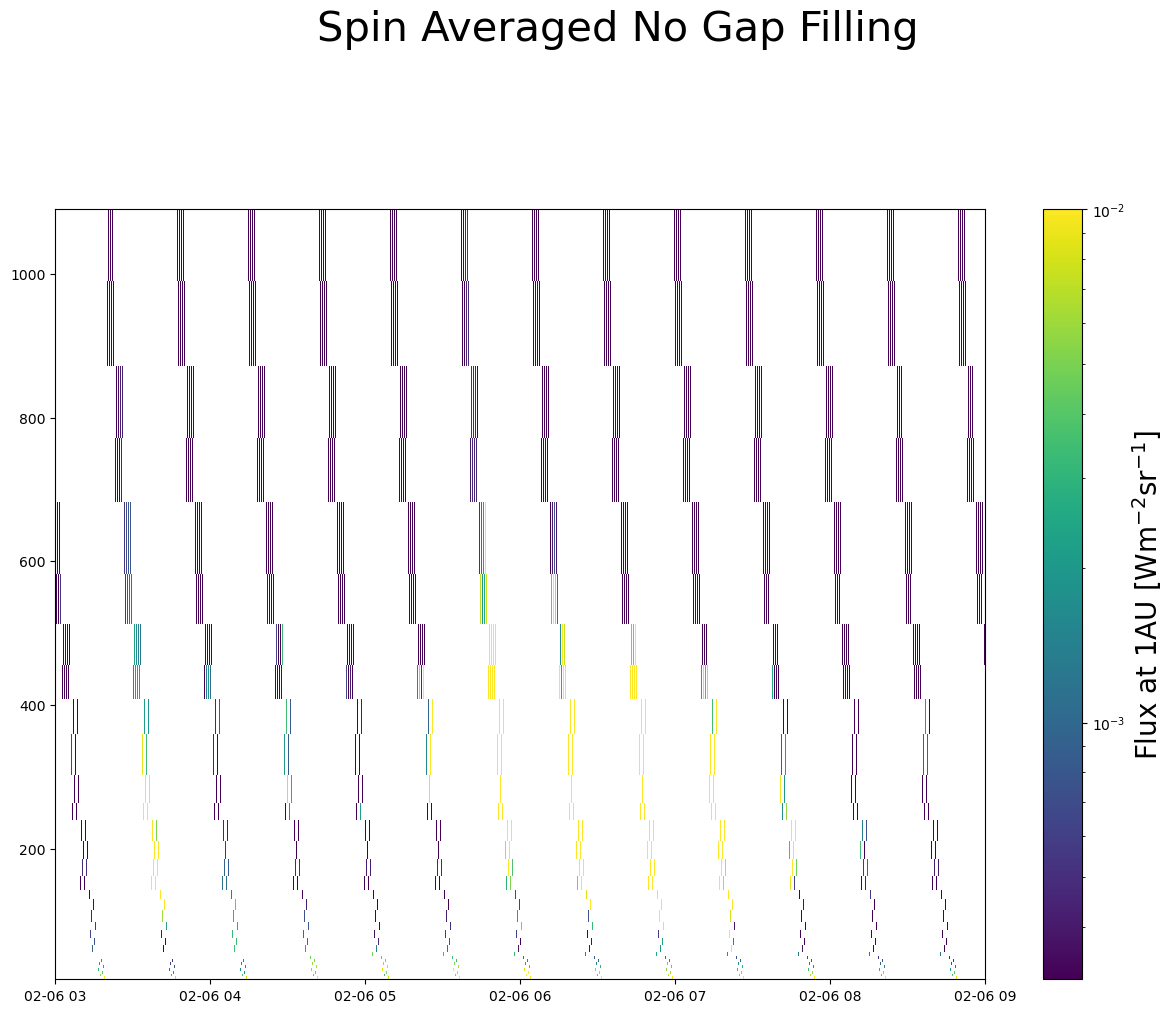

In [15]:
fig=plt.figure(figsize=(15, 10))
ax= fig.add_subplot(111)
fig.suptitle(f"Spin Averaged No Gap Filling", 
                y=1.08, size=30)
pc, vals= spectragram(raw, ax=ax, groupby='SPIN', frequency='FREQ', datetime='DATETIME_Z', flux='VZPAL',
                    start=start, end=end, gap_filling='ignore')
cbar= fig.colorbar(pc, ax=ax)
cbar.set_label('Flux at 1AU [Wm$^{-2}$sr$^{-1}$]', size=20)

## Plot Data with Spin Average and No Gap Filling
Here we make an accurate representation of the data by averaging over a spin and showing the true bandwidth of the channels

0.00031622776601683794 0.01


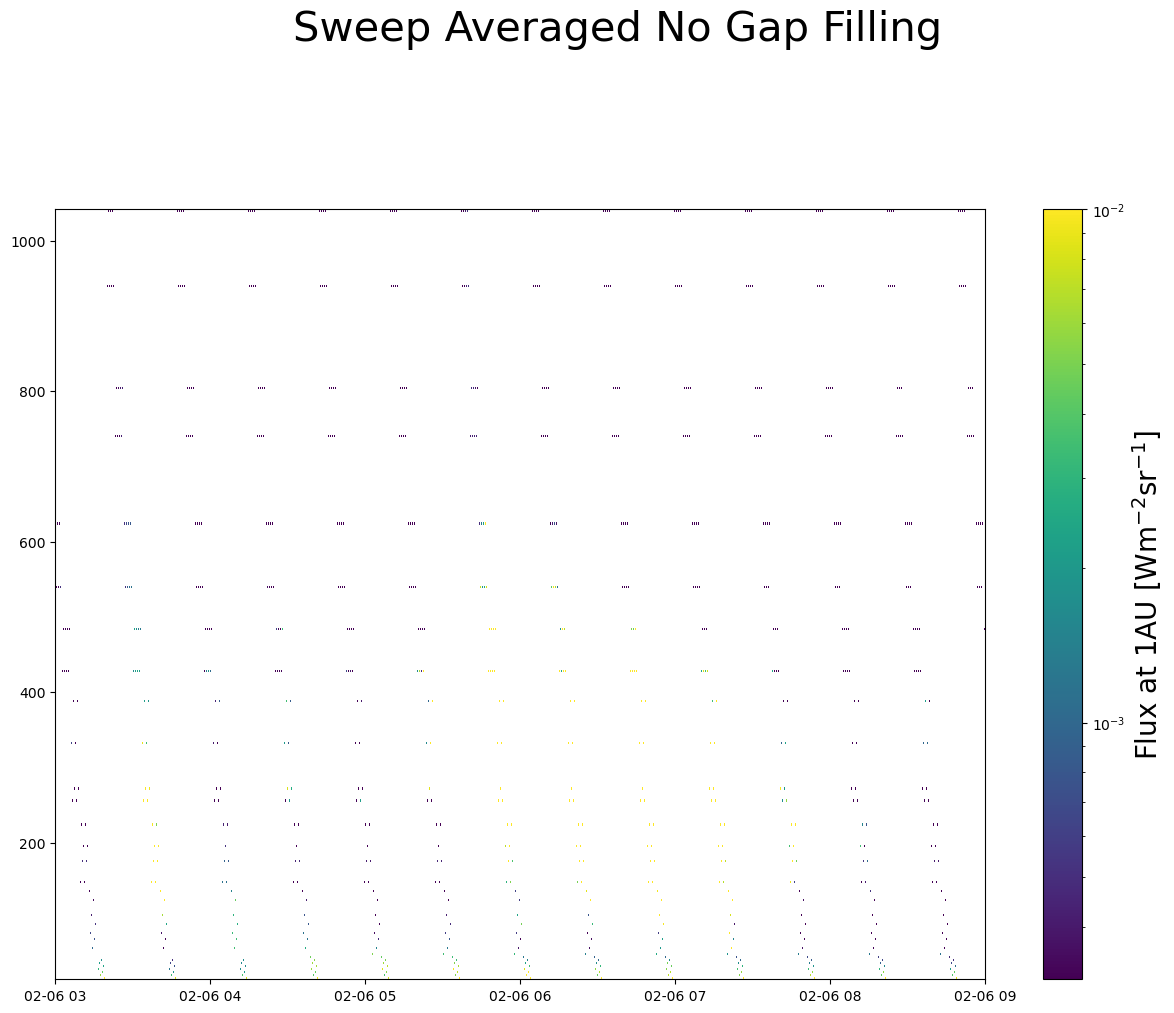

In [16]:
fig=plt.figure(figsize=(15, 10))
ax= fig.add_subplot(111)
fig.suptitle(f"Sweep Averaged No Gap Filling", 
                y=1.08, size=30)
pc, vals= spectragram(raw, ax=ax, groupby='SPIN', frequency='FREQ', datetime='DATETIME_Z', flux='VZPAL',
                    start=start, end=end, gap_filling='keep')
cbar= fig.colorbar(pc, ax=ax)
cbar.set_label('Flux at 1AU [Wm$^{-2}$sr$^{-1}$]', size=20)

## Plot Data with Spin Average and Gap Filling
Here we spin average the channels and then employ the same piecewise 1-D linear interpolation to produce a continual spectra in frequency and time

0.00031622776601683794 0.01


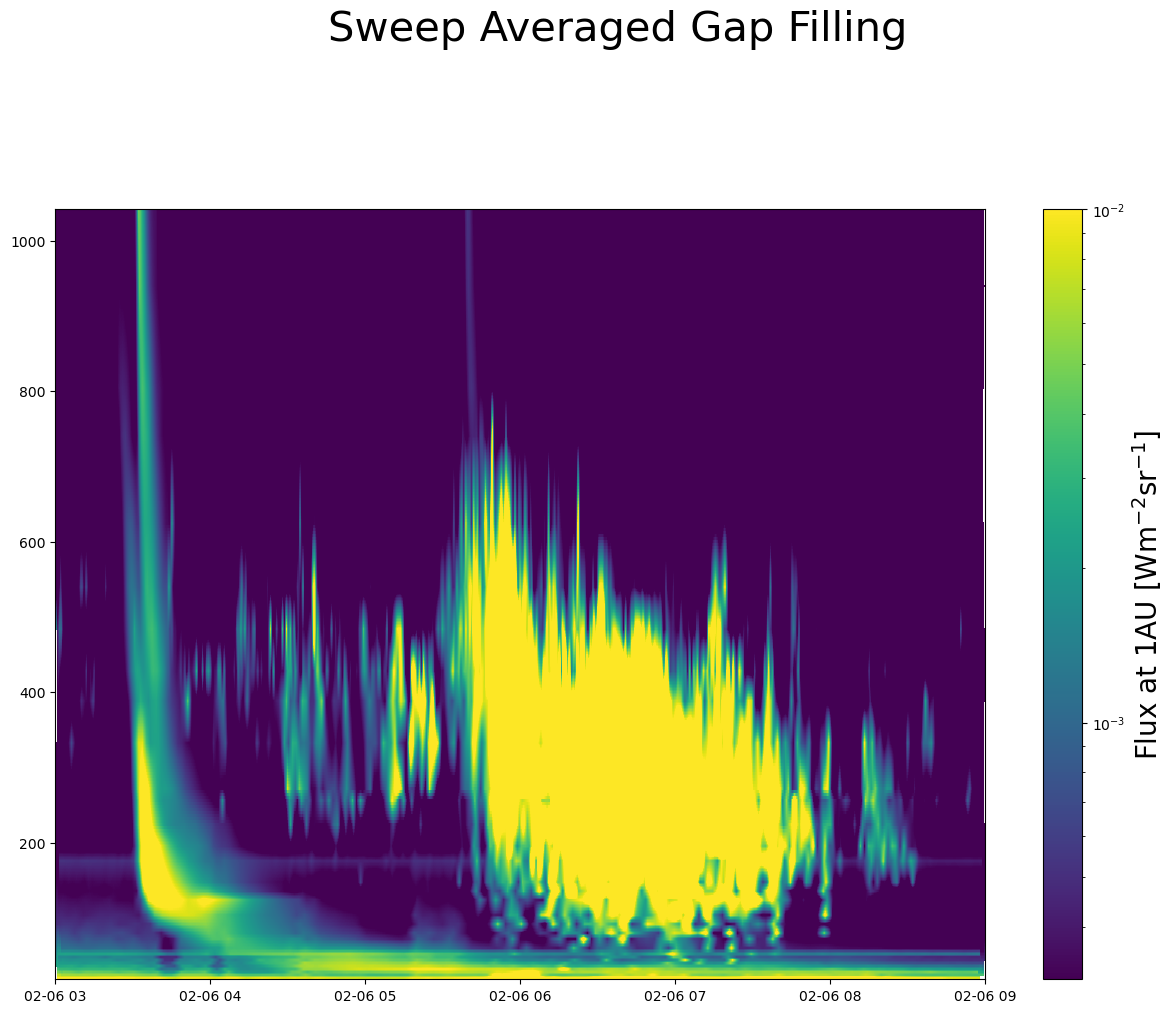

In [17]:
fig=plt.figure(figsize=(15, 10))
ax= fig.add_subplot(111)
fig.suptitle(f"Sweep Averaged Gap Filling", 
                y=1.08, size=30)
pc, vals= spectragram(raw, ax=ax, groupby='SPIN', frequency='FREQ', datetime='DATETIME_Z', flux='VZPAL',
                    start=start, end=end, gap_filling='fill')
cbar= fig.colorbar(pc, ax=ax)
cbar.set_label('Flux at 1AU [Wm$^{-2}$sr$^{-1}$]', size=20)

## Plot Data with Spin Average and Gap Filling and AKR Selected
Here we also implement the AKR thresholding based on the coefficient of variation over a spin that is described in Waters 2022.

0.0031622776601683794 0.1


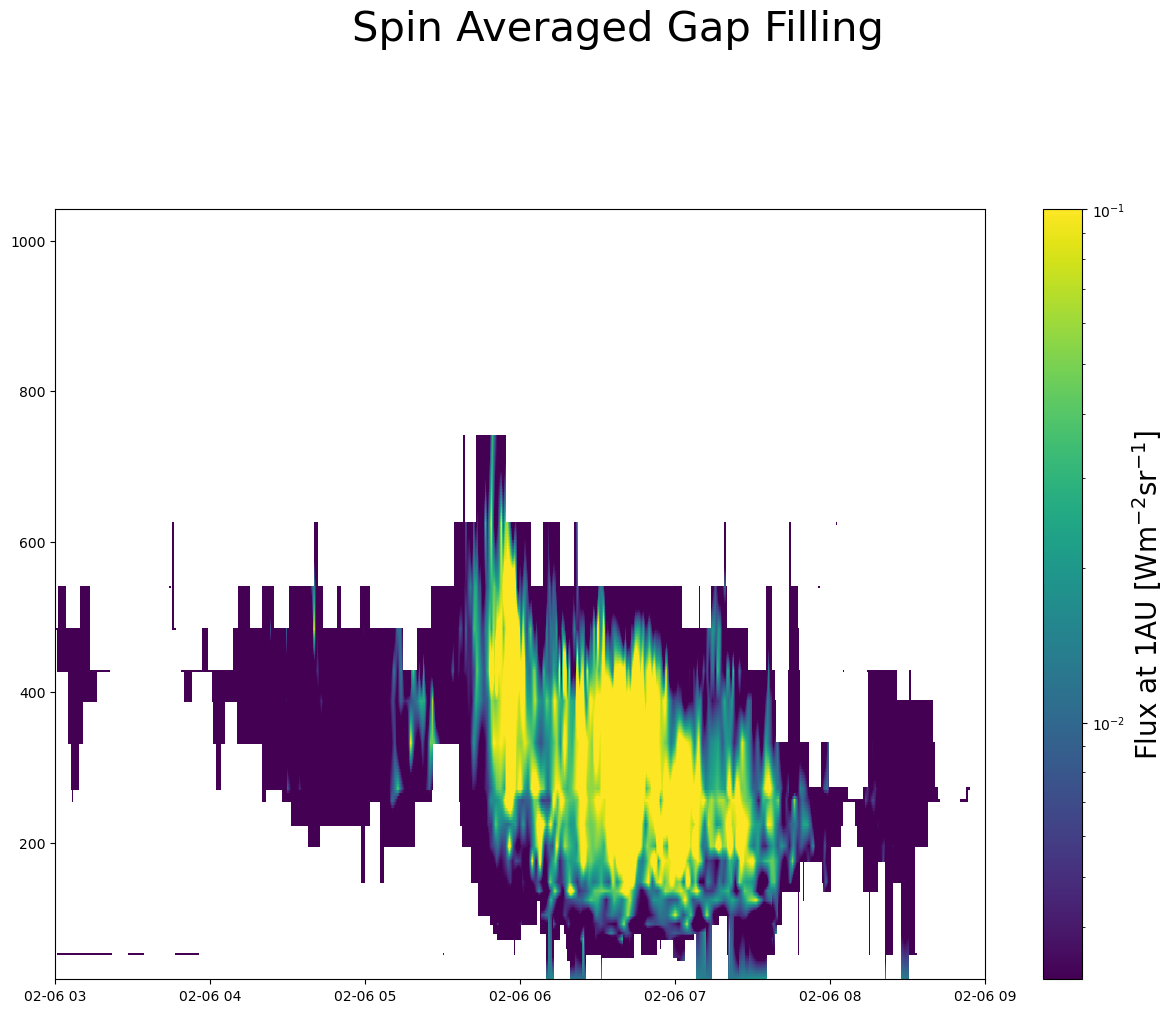

In [20]:
fig=plt.figure(figsize=(15, 10))
ax= fig.add_subplot(111)
fig.suptitle(f"Spin Averaged Gap Filling", 
                y=1.08, size=30)
pc, vals= spectragram(raw, ax=ax, groupby='SPIN', frequency='FREQ', datetime='DATETIME_Z', flux='VZPAL',
                    start=start, end=end, gap_filling='fill', akr_mask=True, akr_threshold=0.1)
cbar= fig.colorbar(pc, ax=ax)
cbar.set_label('Flux at 1AU [Wm$^{-2}$sr$^{-1}$]', size=20)